# Data Loading and Preprocessing

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from numpy.linalg import norm
from random import normalvariate
import math
from math import sqrt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
ratings_file_path = './ml-1m/ratings.dat'
ratings_df = pd.read_csv(ratings_file_path, delimiter='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
ratings_df.head()

/var/folders/p6/6j3gzb2s7797_46mwgzs13s80000gn/T/ipykernel_45298/2533191100.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings_df = pd.read_csv(ratings_file_path, delimiter='::', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
movies_file_path = './ml-1m/movies.dat'
movies_df = pd.read_csv(movies_file_path, delimiter='::', header=None, names=['MovieID', 'Title', 'Genre'],encoding='latin1')
movies_df.head()

/var/folders/p6/6j3gzb2s7797_46mwgzs13s80000gn/T/ipykernel_45298/318624203.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_csv(movies_file_path, delimiter='::', header=None, names=['MovieID', 'Title', 'Genre'],encoding='latin1')


,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies_df['Year'] = movies_df['Title'].str.extract(r'\((\d{4})\)$')
movies_df['Year'] = pd.to_numeric(movies_df['Year'])
movies_df.head()

,MovieID,Title,Genre,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [5]:
user_movie_matrix = pd.pivot_table(ratings_df, values='Rating', index='UserID', columns='MovieID')
user_movie_matrix

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def watched_movies(userID):
    user_ratings = user_movie_matrix.loc[userID].dropna()
    return user_ratings.to_dict()

In [7]:
def watched_movie_ratings(userID):
    ret = user_movie_matrix.loc[userID].dropna()
    return ret

In [8]:
print (movies_df['Year'].max(), movies_df['Year'].min())

2000 1919


In [9]:
max_movieID = int(movies_df['MovieID'].max())
max_userID = int(ratings_df['UserID'].max())
print (max_movieID, max_userID)

3952 6040


In [10]:
users_who_watched_movie = []
for i in range (max_movieID + 1):
  users_who_watched_movie.append ([])

for index,row in user_movie_matrix.iterrows():
  for movie_id, rating in row.items():
    if (pd.notna (rating)):
      users_who_watched_movie[movie_id].append (index)

In [11]:
user_ratings = [[] for _ in range (max_userID + 1)]

for index, row in ratings_df.iterrows():
  userid = int(row["UserID"])
  movieid = int(row["MovieID"])
  rating = int(row["Rating"])
  user_ratings[userid].append ((movieid, rating))


In [12]:
movie_avg_rating = [0 for _ in range (max_movieID + 1)]
movie_cnt_rating = [0 for _ in range (max_movieID + 1)]
user_avg_rating = [0 for _ in range (max_userID + 1)]
user_cnt_rating = [0 for _ in range (max_userID + 1)]

for index, row in ratings_df.iterrows():
  userid = int (row["UserID"])
  movieid = int(row["MovieID"])
  rating = int(row["Rating"])

  movie_avg_rating[movieid] += rating
  movie_cnt_rating[movieid] += 1

  user_avg_rating[userid] += rating
  user_cnt_rating[userid] += 1


for movieID in range (1, max_movieID + 1):
  if (movie_cnt_rating[movieID] == 0):
    continue
  movie_avg_rating[movieID] /= movie_cnt_rating[movieID]

for userID in range (1, max_userID + 1):
  if (user_cnt_rating[userID] == 0):
    continue
  user_avg_rating[userID] /= user_cnt_rating[userID]

In [13]:
columns = ["Action","Adventure","Animation","Children's","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western", "19-40", "41-60", "61-80", "81-00"]

In [14]:
genre_index = {column: index for index, column in enumerate(columns)}
print(genre_index) 

{'Action': 0, 'Adventure': 1, 'Animation': 2, "Children's": 3, 'Comedy': 4, 'Crime': 5, 'Documentary': 6, 'Drama': 7, 'Fantasy': 8, 'Film-Noir': 9, 'Horror': 10, 'Musical': 11, 'Mystery': 12, 'Romance': 13, 'Sci-Fi': 14, 'Thriller': 15, 'War': 16, 'Western': 17, '19-40': 18, '41-60': 19, '61-80': 20, '81-00': 21}


In [15]:
movie_genres = [[] for _ in range (max_movieID + 1)]

for index, row in movies_df.iterrows():
  genres_str = row['Genre']
  genres_list = genres_str.split('|')

  year = row['Year']
  if (year < 1941):
    genres_list.append ("19-40")
  elif (year < 1961):
    genres_list.append ("41-60")
  elif (year < 1981):
    genres_list.append ("61-80")
  else:
    genres_list.append ("81-00")

  movie_genres[row['MovieID']] = (genres_list)

In [16]:
user_genre_ratings_df = pd.DataFrame(columns=['UserID']+columns)
for userid in range (1, max_userID + 1):
  sum_ratings = np.zeros (len(columns))
  cnt_ratings = np.zeros (len(columns))

  for index, pair in enumerate (user_ratings[userid]):
    movieid = pair[0]
    rating = pair[1]

    for genre in movie_genres[movieid]:
      if genre not in genre_index:
        continue
      
      sum_ratings[genre_index[genre]] = np.add (sum_ratings[genre_index[genre]], rating)
      cnt_ratings[genre_index[genre]] = np.add (cnt_ratings[genre_index[genre]], 1)

  cur_genre_ratings = [userid]
  for i in range (len(columns)):
    if (cnt_ratings[i] > 0):
      cur_genre_ratings.append (np.divide (sum_ratings[i], cnt_ratings[i]))
    else:
      cur_genre_ratings.append (np.nan)

  
  user_genre_ratings_df.loc[len(user_genre_ratings_df)] = cur_genre_ratings

  

In [17]:
user_genre_ratings_df

,UserID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,19-40,41-60,61-80,81-00
0,1.0,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,NaN,4.428571,4.00,...,NaN,3.666667,4.333333,3.666667,5.000000,NaN,4.000000,4.500000,4.285714,4.131579
1,2.0,3.500000,3.736842,NaN,NaN,3.560000,3.583333,NaN,3.898734,3.00,...,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333,4.500000,3.625000,4.058824,3.647059
2,3.0,3.956522,4.000000,4.000000,4.000000,3.766667,NaN,NaN,4.000000,4.50,...,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667,NaN,NaN,4.300000,3.804878
3,4.0,4.157895,3.833333,NaN,4.000000,NaN,5.000000,NaN,4.166667,4.50,...,NaN,4.000000,3.555556,3.500000,3.333333,4.500000,4.000000,NaN,4.400000,4.000000
4,5.0,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,NaN,...,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000,4.000000,4.666667,3.000000,3.119792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,6036.0,3.000000,2.987952,3.911765,3.444444,3.203065,3.528302,3.909091,3.505376,3.00,...,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857,4.461538,3.916667,3.687500,3.143478
6036,6037.0,3.642857,4.000000,4.000000,3.666667,3.576271,3.833333,4.000000,3.877551,4.25,...,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000,3.636364,3.871795,3.896552,3.553191
6037,6038.0,3.000000,4.000000,3.666667,3.000000,3.833333,NaN,NaN,3.888889,NaN,...,NaN,4.166667,4.000000,NaN,4.000000,NaN,3.000000,4.500000,3.200000,4.000000
6038,6039.0,4.000000,4.100000,3.615385,3.529412,3.723077,4.000000,NaN,4.000000,3.60,...,4.176471,3.800000,4.250000,4.142857,4.111111,4.500000,3.769231,4.100000,3.864865,3.666667


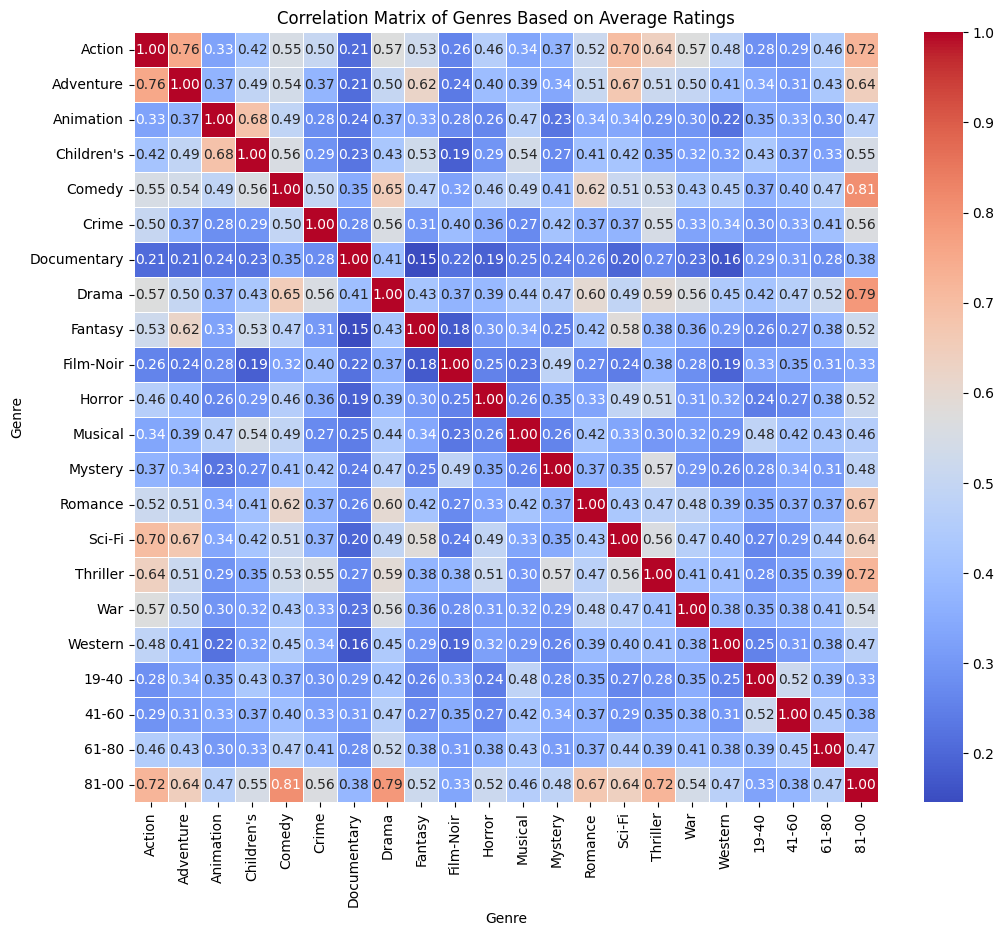

In [18]:
genre_columns = user_genre_ratings_df.columns[1:]

# Compute correlation matrix
genre_correlation = user_genre_ratings_df[genre_columns].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(genre_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Genres Based on Average Ratings')
plt.xlabel('Genre')
plt.ylabel('Genre')
plt.show()

In [19]:
null_percentages_per_column = (user_genre_ratings_df.isnull().mean(axis=0) * 100).round(2)

# Display null percentages for each column
print(null_percentages_per_column)

UserID          0.00
Action          0.46
Adventure       2.42
Animation      20.40
Children's     12.53
Comedy          0.15
Crime           6.26
Documentary    62.86
Drama           0.05
Fantasy        19.70
Film-Noir      31.29
Horror         12.25
Musical        21.29
Mystery        15.02
Romance         1.31
Sci-Fi          2.14
Thriller        0.84
War             4.49
Western        32.12
19-40          41.77
41-60          23.76
61-80           5.60
81-00           0.00
dtype: float64


We replace the NULL values with column average, or replace the it by the genre average.

In [20]:
column_means = user_genre_ratings_df.mean()
user_genre_ratings_df.fillna(column_means, inplace=True)

In [21]:
null_percentages_per_row = (user_genre_ratings_df.isnull().mean(axis=1) * 100).round(2)

# Display null percentages for each row
print(null_percentages_per_row[null_percentages_per_row > 0])

Series([], dtype: float64)


In [22]:
user_genre_ratings_df.head()

,UserID,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,19-40,41-60,61-80,81-00
0,1.0,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,3.849741,4.428571,4.000000,...,3.740407,3.666667,4.333333,3.666667,5.000000,3.626491,4.000000,4.500000,4.285714,4.131579
1,2.0,3.500000,3.736842,3.695687,3.527253,3.560000,3.583333,3.849741,3.898734,3.000000,...,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333,4.500000,3.625000,4.058824,3.647059
2,3.0,3.956522,4.000000,4.000000,4.000000,3.766667,3.769441,3.849741,4.000000,4.500000,...,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667,3.945054,3.978356,4.300000,3.804878
3,4.0,4.157895,3.833333,3.695687,4.000000,3.638193,5.000000,3.849741,4.166667,4.500000,...,3.740407,4.000000,3.555556,3.500000,3.333333,4.500000,4.000000,3.978356,4.400000,4.000000
4,5.0,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,3.579154,...,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000,4.000000,4.666667,3.000000,3.119792


# SVD

https://stevealbertwong.github.io/2016/12/23/SVD/

In [23]:
def random_unit_vector(size):
    unnormalized = [normalvariate(0, 1) for _ in range(size)]
    norm = sqrt(sum(v * v for v in unnormalized))
    return [v / norm for v in unnormalized]
 
def power_iterate(X, epsilon=1e-10):    
    """ Recursively compute X^T X dot v to compute weights vector/eignevector """
 
    n, m = X.shape
    start_v = random_unit_vector(m) # start of random surf
    prev_eigenvector = None
    curr_eigenvector = start_v
    covariance_matrix = np.dot(X.T, X)
 
    ## power iterationn until converges
    it = 0        
    while True:
        it += 1
        prev_eigenvector = curr_eigenvector
        curr_eigenvector = np.dot(covariance_matrix, prev_eigenvector)
        curr_eigenvector = curr_eigenvector / norm(curr_eigenvector)
 
        if abs(np.dot(curr_eigenvector, prev_eigenvector)) > 1 - epsilon:            
            return curr_eigenvector

def svd(X, epsilon=1e-10):
    """after computed change of basis matrix from power iteration, compute distance"""
    n, m = X.shape
    change_of_basis = []
 
    for i in range(m):
        data_matrix = X.copy()
 
        for sigma, u, v in change_of_basis[:i]:
            data_matrix -= sigma * np.outer(u, v) 
 
        v = power_iterate(data_matrix, epsilon=epsilon) ## eigenvector 
        u_sigma = np.dot(X, v) ## 2nd step: XV = U Sigma 
        sigma = norm(u_sigma)  
        u = u_sigma / sigma
 
        change_of_basis.append((sigma, u, v))
     
    sigmas, us, v_transposes = [np.array(x) for x in zip(*change_of_basis)]
 
    return sigmas, us.T, v_transposes       

In [24]:
sigma, U, V_T = svd(user_genre_ratings_df.iloc[:, 1:].to_numpy())
U_features = U[:, :(user_genre_ratings_df.shape[1] - 1)]

In [25]:
sigma

array([1364.35821149,   64.14518175,   63.70920606,   52.72597792,
         50.90678745,   48.18105518,   45.16238549,   44.91300587,
         42.5808681 ,   41.06284841,   40.84198027,   39.22261665,
         36.9074559 ,   35.49405239,   33.6377303 ,   33.41785576,
         29.56984766,   27.54512746,   24.76134604,   20.96879467,
         20.09969682,   11.36599757])

# K-Means

We use K-Means on the user matrix given by the SVD.

In [26]:
class k_means:
  def __init__ (self, k, iterations):
    self.k = k
    self.iterations = iterations

    self.clusters = []
    for _ in range (self.k):
      self.clusters.append ([])
      
    self.centroids = []
    self.loss = 0.0 
  
  
  def get_labels (self, data):
    self.data = data
    self.cnt_samples, self.cnt_features = data.shape 
    
    self.centroids = self.kmeansplusplus ()
    # centroids = np.zeros((self.k, self.cnt_features)) # row , column full with zero 
    # for K in range (self.k): # iterations of 
    #   random_var = np.random.choice(range(self.cnt_samples))
    #   centroid = data[random_var] # random centroids
    #   centroids[K] = centroid
    # self.centroids = centroids

    self.optimise ()

    # getting labels
    labels = np.empty (self.cnt_samples)
    for cluster_index, cluster in enumerate (self.clusters): 
      for point in cluster:
        labels[point] = cluster_index

    self.inertia (self.data, labels)

    return labels

  # https://stackoverflow.com/questions/5466323/how-could-one-implement-the-k-means-algorithm
  def kmeansplusplus (self):
    random_state = 42
    np.random.seed (random_state)
    centroids = [self.data[0]]

    for _ in range (1, self.k):
        D2 = np.array ([min([np.inner(c-x,c-x) for c in centroids]) for x in self.data])
        probs = D2 / D2.sum ()
        cumprobs = probs.cumsum ()
        r = np.random.rand ()
        
        for j, p in enumerate(cumprobs):
            if r < p:
                i = j
                break
        
        centroids.append (self.data[i])

    return np.array (centroids)
  
  def optimise (self):
    for _ in range (self.iterations):
      self.clusters = self.clusterize () # new clusters according to old centroids
      current_centroids = self.centroids 
      self.centroids = self.update_centroids ()

      sum = 0
      for i in range (len (self.centroids)):
        sum += self.distance (current_centroids[i], self.centroids[i])

      if (sum == 0): # converged
        break      

     
  def clusterize (self):
    clusters = []
    for _ in range (self.k):
      clusters.append ([])

    for index, point in enumerate (self.data):
      closest = self.closest_centroid (point) #closest centroid
      clusters[closest].append (index)

    return clusters

  def closest_centroid (self, point):
    min_distance = self.distance (point, self.centroids[0])
    closest = 0
    for i in range (1, len (self.centroids)):
      current_dist = self.distance (point, self.centroids[i])
      if (current_dist < min_distance):
        min_distance = current_dist
        closest = i

    return closest

  def update_centroids (self):
    centroids = np.zeros ((self.k, self.cnt_features))
    
    for cluster_idx, cluster in enumerate(self.clusters):
        if len(cluster) > 0:
            cluster_mean = np.mean(self.data[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
    
    return centroids


  def distance (self, point1, point2) : # eucledian distance
    return np.sqrt (np.sum ((point1 - point2) ** 2))


  def inertia (self, datapoints: list[int],labels: list[any])->None:
    for index, points in enumerate (datapoints):
      #print (index, labels[index])
      self.loss += (self.distance (self.centroids[int(labels[index])], points)) ** 2
  
  def predict(self, point):
    return self.closest_centroid (point)

In [27]:
distortions = []
for K in range (1, 51):
    kmeanModel = k_means(k=K,iterations=150)
    kmeanModel.get_labels(np.array(U_features))
    distortions.append(kmeanModel.loss)

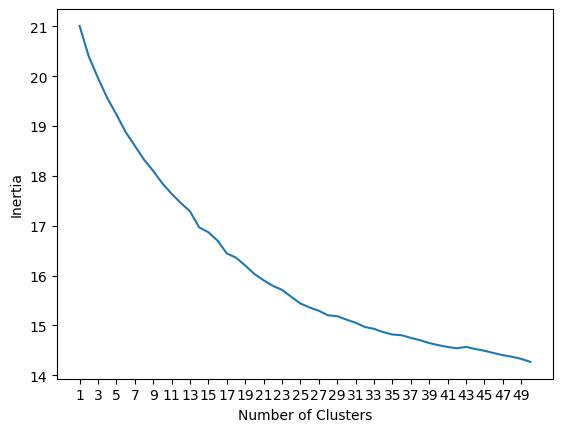

In [28]:
x_axis = [x for x in range(1, 51)]
plt.plot(x_axis, distortions)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
# Adjust the step size for x-axis ticks
plt.xticks(np.arange(min(x_axis), max(x_axis) + 1, step=2))  # Assuming step=2 for more spaced out ticks
plt.show()

Comparision with Library K-Means

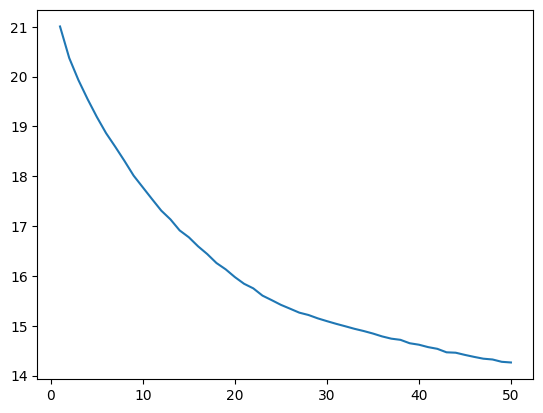

In [29]:
distortions = []
for K in range (1, 51):
    kmeanModel = KMeans(n_clusters = K, random_state = 42,init='random')
    kmeanModel.fit(U_features)
    distortions.append(kmeanModel.inertia_)

x_axis = [x for x in range(1, 51)]
plt.plot(x_axis, distortions)

In [30]:
cluster_size = 38

In [31]:
kmeans = k_means (cluster_size, 1000)
labels = kmeans.get_labels(U_features)

In [32]:
# kmeans = KMeans(n_clusters = cluster_size, random_state = 42,init='k-means++')
# kmeans.fit(U_features)
# labels = kmeans.labels_


In [33]:
labels

array([ 0., 20.,  7., ...,  2., 20., 21.])

In [34]:
clusters = [[] for _ in range (cluster_size)]

for i in range (0, labels.shape[0]) :
  clusters[int(labels[i])].append (i + 1)

print (clusters)

[[1, 55, 71, 94, 115, 132, 138, 142, 152, 233, 274, 283, 356, 370, 385, 428, 486, 542, 565, 592, 598, 645, 674, 680, 682, 705, 723, 726, 761, 763, 768, 834, 842, 888, 900, 938, 965, 1000, 1011, 1016, 1025, 1111, 1157, 1197, 1234, 1249, 1269, 1305, 1324, 1350, 1374, 1428, 1443, 1467, 1486, 1518, 1546, 1549, 1595, 1620, 1673, 1679, 1684, 1704, 1711, 1718, 1770, 1775, 1795, 1862, 1876, 1886, 1995, 2065, 2074, 2079, 2086, 2096, 2115, 2121, 2144, 2152, 2155, 2160, 2190, 2227, 2268, 2280, 2307, 2311, 2337, 2354, 2379, 2385, 2435, 2510, 2520, 2559, 2589, 2604, 2697, 2704, 2705, 2736, 2787, 2828, 2845, 2862, 2948, 3006, 3104, 3200, 3220, 3269, 3298, 3358, 3372, 3384, 3446, 3456, 3485, 3495, 3556, 3559, 3568, 3616, 3631, 3654, 3713, 3719, 3738, 3740, 3752, 3795, 3811, 3880, 3920, 3932, 3933, 3947, 3977, 3988, 4031, 4038, 4073, 4100, 4143, 4176, 4200, 4205, 4256, 4304, 4353, 4402, 4474, 4492, 4630, 4641, 4660, 4784, 4846, 4853, 4863, 4876, 4877, 4936, 4986, 5043, 5049, 5073, 5104, 5122, 5143, 51

# User-User Collaborative Filtering

In [35]:
def similarity (new_user_ratings,user_ratings, new_user_mean, user_mean):
    if (len(new_user_ratings) == 0):
        return 0

    new_user_ratings2 = new_user_ratings - new_user_mean
    user_ratings2 = user_ratings - user_mean

    num = np.dot(new_user_ratings2, user_ratings2)

    new_user_ratings_square = new_user_ratings2**2
    user_ratings_square = user_ratings2**2

    term1 = np.sqrt(np.sum(new_user_ratings_square))
    term2 = np.sqrt(np.sum(user_ratings_square))

    if term1 == 0 or term2 == 0:
        return 0

    return num/(term1*term2)

In [36]:
watchFreq = pd.DataFrame (movie_cnt_rating, columns = ['Frequency'])
watchFreq.reset_index(inplace=True)
watchFreq = watchFreq.drop (watchFreq.index[0])
watchFreq = watchFreq.rename(columns={'index': 'movieID'})
watchFreq

,movieID,Frequency
1,1,2077
2,2,701
3,3,478
4,4,170
5,5,296
...,...,...
3948,3948,862
3949,3949,304
3950,3950,54
3951,3951,40


In [37]:
watchFreq['Frequency'].mean()

253.08932186234819

1.0337362818951144


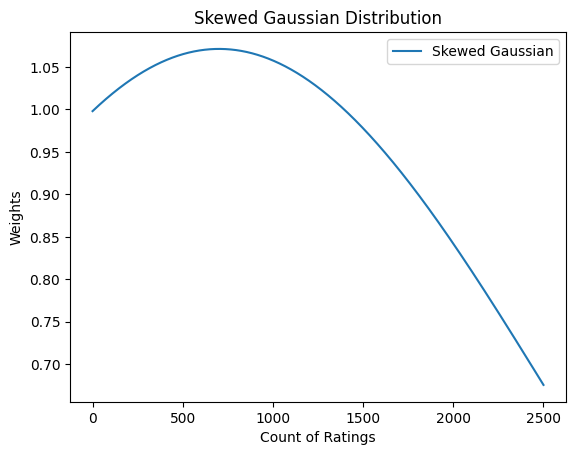

In [38]:
# Parameters
mean1 = 10
std_dev1 = 2000
skewness1 = 0.5 

def skewed_gaussian_value(x, mean = mean1, std_dev = std_dev1, skewness = skewness1):
    t = (x - mean) / std_dev
    return np.exp(-0.5 * t**2) * (1 + math.erf(skewness * t / np.sqrt(2)))

print(skewed_gaussian_value(1200, mean1, std_dev1, skewness1))

# Generate x values
x_values = np.linspace(0, 2500, 2500)

# Calculate corresponding y values for skewed Gaussian
y_values = np.vectorize(lambda x: skewed_gaussian_value(x, mean1, std_dev1, skewness1))(x_values)

# Plot the skewed Gaussian distribution
plt.plot(x_values, y_values, label='Skewed Gaussian')
plt.title('Skewed Gaussian Distribution')
plt.xlabel('Count of Ratings')
plt.ylabel('Weights')
plt.legend()
plt.show()

In [39]:
watchFreq['Weight'] = watchFreq["Frequency"].apply(skewed_gaussian_value)
watchFreq.sort_values('Weight', inplace=True, ascending = False)
watchFreq.head()

,movieID,Frequency,Weight
2,2,701,1.071267
3763,3763,701,1.071267
288,288,700,1.071267
1263,1263,700,1.071267
2572,2572,700,1.071267


In [40]:
popMovieWeights = [0 for _ in range (max_movieID + 1)]
for idx, row in watchFreq.iterrows ():
  popMovieWeights[int(row['movieID'])] = float (row['Weight'])


In [41]:
def weighted_similarity (new_user_ratings,user_ratings,movieIDs, new_user_mean, user_mean):   #assuming input as Series objects
    if (len(new_user_ratings) == 0):
        return 0

    new_user_ratings2 = new_user_ratings - new_user_mean
    user_ratings2 = user_ratings - user_mean
    weights = [popMovieWeights[key] for key in movieIDs]

    num = sum(x * y * z for x, y, z in zip(weights, user_ratings2, new_user_ratings2))

    new_user_ratings_square = new_user_ratings2**2
    user_ratings_square = user_ratings2**2

    term1 = np.sqrt(np.dot(new_user_ratings_square,weights))
    term2 = np.sqrt(np.dot(user_ratings_square,weights))


    if term1 == 0 or term2 == 0:
        return 0

    return num/(term1*term2)

In [42]:
def watched_movies_intersection (user1_movies, user2_movies):
    np_user1_movies = np.array(list(user1_movies))
    np_user2_movies = np.array(list(user2_movies))

    return np.intersect1d(np_user1_movies,np_user2_movies)

In [43]:
def new_rating_user_user (new_movie_ratings, cluster_id): 
  np_new_movie_ratings = np.array(list(new_movie_ratings.values()))
  new_mean = np.mean(np_new_movie_ratings)

  all_movie_ratings = [new_mean for _ in range (max_movieID + 1)]
  num_all = [0 for _ in range (max_movieID + 1)]
  den_all = [0 for _ in range (max_movieID + 1)]

  top_users = []
  for userID in clusters[cluster_id]:
    user_movie_ratings = watched_movies(userID)
    mean = user_avg_rating[userID]
        
    common_movies = watched_movies_intersection(user_movie_ratings.keys(),new_movie_ratings.keys())
    common_user_movie_ratings = np.array([user_movie_ratings[movie] for movie in common_movies]).astype(float)
    common_new_movie_ratings = np.array([new_movie_ratings[movie] for movie in common_movies]).astype(float)
    
    sim = weighted_similarity(common_new_movie_ratings, common_user_movie_ratings, common_movies, new_mean, mean)  #remove the comment to use weighted similarity
    #sim = similarity(common_new_movie_ratings, common_user_movie_ratings, new_mean, mean)    #remove the comment to use normal Pearson's co-efficient
    top_users.append ((sim, userID))

    # for movieID in user_movie_ratings.keys():
    #    num_all[movieID] += sim * (user_movie_ratings[int(movieID)] - mean)
    #    den_all[movieID] += abs (sim)

  top_users = sorted (top_users, reverse=True)
  for i in range (min (20, len (top_users))):
    sim = top_users[i][0]
    userID = top_users[i][1]

    user_movie_ratings = watched_movies(userID)
    mean = user_avg_rating[userID]

    for movieID in user_movie_ratings.keys():
       num_all[movieID] += sim * (user_movie_ratings[int(movieID)] - mean)
       den_all[movieID] += abs (sim)

  
  for movieID in range (1, max_movieID + 1):
    if (den_all[movieID] > 0):
      all_movie_ratings[movieID] += (num_all[movieID] / den_all[movieID])
    else:
      all_movie_ratings[movieID] = 0

  return all_movie_ratings    
    

In [44]:
def new_rating_avg (new_movie_ratings, cluster_id):  
  np_new_movie_ratings = np.array(list(new_movie_ratings.values()))
  new_mean = np.mean(np_new_movie_ratings)

  all_movie_ratings = [new_mean for _ in range (max_movieID + 1)]
  num_all = [0 for _ in range (max_movieID + 1)]
  den_all = [0 for _ in range (max_movieID + 1)]

  for userID in clusters[cluster_id]:
    user_movie_ratings = watched_movies(userID)
    mean = user_avg_rating[userID]

    for movieID in user_movie_ratings.keys():
       num_all[movieID] += (user_movie_ratings[int(movieID)] - mean)
       den_all[movieID] += 1


  for movieID in range (1, max_movieID + 1):
    if (den_all[movieID] > 0):
      all_movie_ratings[movieID] += (num_all[movieID] / den_all[movieID])
    else:
      all_movie_ratings[movieID] = 0

  return all_movie_ratings    

In [45]:
def movie_id_to_title (movieID):
    for index,row in movies_df.iterrows():
        if row['MovieID'] == movieID:
            return row['Title']

In [46]:
def get_genre_ratings (new_movie_ratings):
  sum_ratings = np.zeros (len(columns))
  cnt_ratings = np.zeros (len(columns))
  for key in new_movie_ratings:
    movieid = key
    rating = new_movie_ratings[key]

    for genre in movie_genres[movieid]:
      if genre not in genre_index:
        continue
      
      sum_ratings[genre_index[genre]] = np.add (sum_ratings[genre_index[genre]], rating)
      cnt_ratings[genre_index[genre]] = np.add (cnt_ratings[genre_index[genre]], 1)

  new_genre_ratings = []
  for i in range (len(columns)):
    if (cnt_ratings[i] > 0):
      new_genre_ratings.append (np.divide (sum_ratings[i], cnt_ratings[i]))
    else:
      new_genre_ratings.append (np.nan)

  for i in range (len (new_genre_ratings)):
    if np.isnan (new_genre_ratings[i]):
      new_genre_ratings[i] = column_means[columns[i]]
  
  return new_genre_ratings
    

In [47]:
def convert_svd (new_movie_ratings):
  new_genre_ratings = get_genre_ratings (new_movie_ratings)
  Vtt = V_T.T
  svded_row = []
  for i in range (1, U_features.shape[1] + 1):
    val = np.dot (new_genre_ratings, Vtt[:, i-1])
    if (sigma[i-1] == 0):
      svded_row.append(0)
    else:
      svded_row.append (np.divide (val, sigma[i-1]))

  return svded_row
  

In [48]:
def recommendMovies (new_movie_ratings) :
  svded_row = convert_svd (new_movie_ratings)
  cluster_id = int(kmeans.predict (np.array(svded_row, dtype=float).reshape(1, user_genre_ratings_df.shape[1] - 1)))

  global new_svdedrow
  global new_clusterid
  new_svdedrow = svded_row
  new_clusterid = cluster_id

  new_ratings = []
  new_movies = []
  unwatched_movie_ratings = {}

  new_ratings_all = new_rating_user_user (new_movie_ratings, cluster_id)
  #new_ratings_all = new_rating_avg (new_movie_ratings, cluster_id)
  for movieID in range (1, max_movieID + 1):
      if (movieID in new_movie_ratings):
          continue
      
      new_ratings.append (new_ratings_all[movieID])
      new_movies.append (movieID)
      unwatched_movie_ratings[movieID] = new_ratings_all[movieID]

  new_ratings.sort(reverse=True)
  sorted_dict_desc = dict(sorted(unwatched_movie_ratings.items(), key=lambda item: item[1], reverse=True))
  top_10_movies = dict(list(sorted_dict_desc.items())[:10])

  return top_10_movies

In [49]:
def getFilmDetails (new_movie_ratings) :
  new_data_temp = [(k, v) for k, v in new_movie_ratings.items()]
  new_movie_ratings_df = pd.DataFrame(new_data_temp, columns = ['MovieID', 'Rating'])

  new_movie_genres = []
  new_movie_names = []
  new_movie_avg_rating = []
  new_movie_cnt_rating = []

  for (k, v) in new_movie_ratings.items():
    new_movie_genres.append (movie_genres[k])
    new_movie_names.append (movie_id_to_title (k))
    new_movie_avg_rating.append (movie_avg_rating[k])
    new_movie_cnt_rating.append (movie_cnt_rating[k])

  new_movie_ratings_df['Name'] = new_movie_names
  new_movie_ratings_df['Genres'] = new_movie_genres
  new_movie_ratings_df['Average Rating'] = new_movie_avg_rating
  new_movie_ratings_df['Count of Ratings'] = new_movie_cnt_rating

  return new_movie_ratings_df

In [50]:
new_movie_ratings = {47:5,111:4,123:5,215:5,1196:4,296:5,318:5,541:5,924:5,1221:5,1237:4}
#new_movie_ratings = {47:1,111:2,123:1,215:1,1196:2,296:1,318:1,541:1,924:1,1221:1,1237:2}

new_movie_ratings = {172:5, 1389:4 ,1562:5, 2145:4, 1888:4, 2724:4, 3287:5, 3315:5, 3718:4, 56:5, 320:5, 427:5, 512:5, 516:5, 967:5}
# new_movie_ratings = {172:1, 1389:2 ,1562:2, 2145:1, 1888:1, 2724:2, 3287:1, 3315:1, 3718:1, 56:1, 320:1, 427:1, 512:1, 516:1, 967:1}

#new_movie_ratings = {6:5, 593:4, 1:5, 47:4, 586:5, 589:4, 165:5, 2571:4, 3668:5, 1203:4, 858:5, 527:4, 920:5, 1350:4, 1210:5}
# new_movie_ratings = {6:1, 593:2, 1:1, 47:2, 586:1, 589:2, 165:1, 2571:2, 3668:1, 1203:2, 858:1, 527:2, 920:1, 1350:2, 1210:1}

# new_movie_ratings = {6:5, 593:4, 1:5, 47:4, 586:5, 589:4, 165:5, 2571:4, 3668:5, 1203:4, 858:5, 527:4, 920:5, 1350:4, 1210:5, 172:1, 1389:2 ,1562:2, 2145:1, 1888:1, 2724:2, 3287:1, 3315:1, 3718:1, 56:1, 320:1, 427:1, 512:1, 516:1, 967:1}
# new_movie_ratings = {172:5, 1389:4 ,1562:5, 2145:4, 1888:4, 2724:4, 3287:5, 3315:5, 3718:4, 56:5, 320:5, 427:5, 512:5, 516:5, 967:5, 6:1, 593:2, 1:1, 47:2, 586:1, 589:2, 165:1, 2571:2, 3668:1, 1203:2, 858:1, 527:2, 920:1, 1350:2, 1210:1}

In [51]:
def movieNameToID (movie_string):
  movie_name = movie_string.split("::")[0]
  for index,row in movies_df.iterrows():
    if row['Title'] == movie_name:
      return row['MovieID']

In [52]:
def get_rating_dict (film_names, film_ratings):
  new_movie_ratings = {}

  for i in range (len (film_names)):
    movieID = movieNameToID (film_names[i])
    new_movie_ratings[movieID] = film_ratings[i]

  return new_movie_ratings


In [53]:
movie_string_list = [
"Seven (Se7en) (1995)::Crime|Thriller",
"Taxi Driver (1976)::Drama|Thriller",
"Chungking Express (1994)::Drama|Mystery|Romance",
"Seven (Se7en) (1995)::Crime|Thriller",
"Before Sunrise (1995)::Drama|Romance",
"Pulp Fiction (1994)::Crime|Drama",
"Shawshank Redemption, The (1994)::Drama",
"Blade Runner (1982)::Film-Noir|Sci-Fi",
"2001: A Space Odyssey (1968)::Drama|Mystery|Sci-Fi|Thriller",
"Godfather: Part II, The (1974)::Action|Crime|Drama",
"Seventh Seal, The (Sjunde inseglet, Det) (1957)::Drama"
]

movie_rating_list = [5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4]

In [54]:
new_movie_ratings = get_rating_dict (movie_string_list, movie_rating_list)
print (new_movie_ratings)

{47: 5, 111: 4, 123: 5, 215: 5, 296: 5, 318: 5, 541: 5, 924: 5, 1221: 5, 1237: 4}


In [55]:
new_movie_ratings_df = getFilmDetails (new_movie_ratings)
new_movie_ratings_df

,MovieID,Rating,Name,Genres,Average Rating,Count of Ratings
0,47,5,Seven (Se7en) (1995),"[Crime, Thriller, 81-00]",4.106420,1137
1,111,4,Taxi Driver (1976),"[Drama, Thriller, 61-80]",4.183871,1240
2,123,5,Chungking Express (1994),"[Drama, Mystery, Romance, 81-00]",3.869565,115
3,215,5,Before Sunrise (1995),"[Drama, Romance, 81-00]",3.806250,160
4,296,5,Pulp Fiction (1994),"[Crime, Drama, 81-00]",4.278213,2171
5,318,5,"Shawshank Redemption, The (1994)","[Drama, 81-00]",4.554558,2227
6,541,5,Blade Runner (1982),"[Film-Noir, Sci-Fi, 81-00]",4.273333,1800
7,924,5,2001: A Space Odyssey (1968),"[Drama, Mystery, Sci-Fi, Thriller, 61-80]",4.068765,1716
8,1221,5,"Godfather: Part II, The (1974)","[Action, Crime, Drama, 61-80]",4.357565,1692
9,1237,4,"Seventh Seal, The (Sjunde inseglet, Det) (1957)","[Drama, 41-60]",4.230769,299


In [56]:
top_10 = recommendMovies (new_movie_ratings)
top_10_df = getFilmDetails (top_10)
top_10_df

,MovieID,Rating,Name,Genres,Average Rating,Count of Ratings
0,2393,6.318519,Star Trek: Insurrection (1998),"[Action, Sci-Fi, 81-00]",3.348203,807
1,922,6.118182,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),"[Film-Noir, 41-60]",4.491489,470
2,2940,6.118182,Gilda (1946),"[Film-Noir, 41-60]",4.009346,107
3,1092,6.090909,Basic Instinct (1992),"[Mystery, Thriller, 81-00]",3.541944,751
4,2571,6.090909,"Matrix, The (1999)","[Action, Sci-Fi, Thriller, 81-00]",4.315830,2590
5,3471,6.038095,Close Encounters of the Third Kind (1977),"[Drama, Sci-Fi, 61-80]",4.014473,1451
6,1496,5.942857,Anna Karenina (1997),"[Drama, Romance, 81-00]",3.160000,25
7,2067,5.942857,Doctor Zhivago (1965),"[Drama, Romance, War, 61-80]",4.065603,564
8,2070,5.942857,Tender Mercies (1983),"[Drama, 81-00]",3.905303,264
9,2433,5.942857,"Civil Action, A (1998)","[Drama, 81-00]",3.359477,612
